In [1]:
#python 2 used here
import numpy as np
from sklearn import mixture
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt

Notes about multivariable_normal

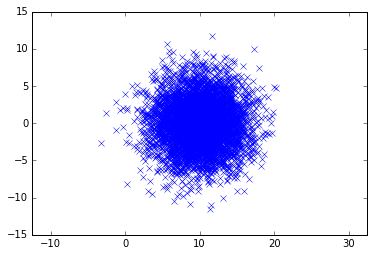

In [22]:
%matplotlib inline
mean = [10, 0]
cov = [[10, 0], [0, 10]]  # diagonal covariance

x,y = np.random.multivariate_normal(mean, cov, 5000).T# x and y are each a list contain 5000 obs
plt.plot(x, y, 'x')#'x' shape, 'y' is also applicable
plt.axis('equal')#same scale along x and y axis
plt.show()

(2L, 5000L)

In [29]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(10)  # for repeatability 
c1 = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
l1 = np.zeros(100)
l2 = np.ones(100)
c2 = np.random.multivariate_normal([0, 10], [[3, 1], [1, 4]], size=[100,])


In [30]:
c1.shape


(100L, 2L)

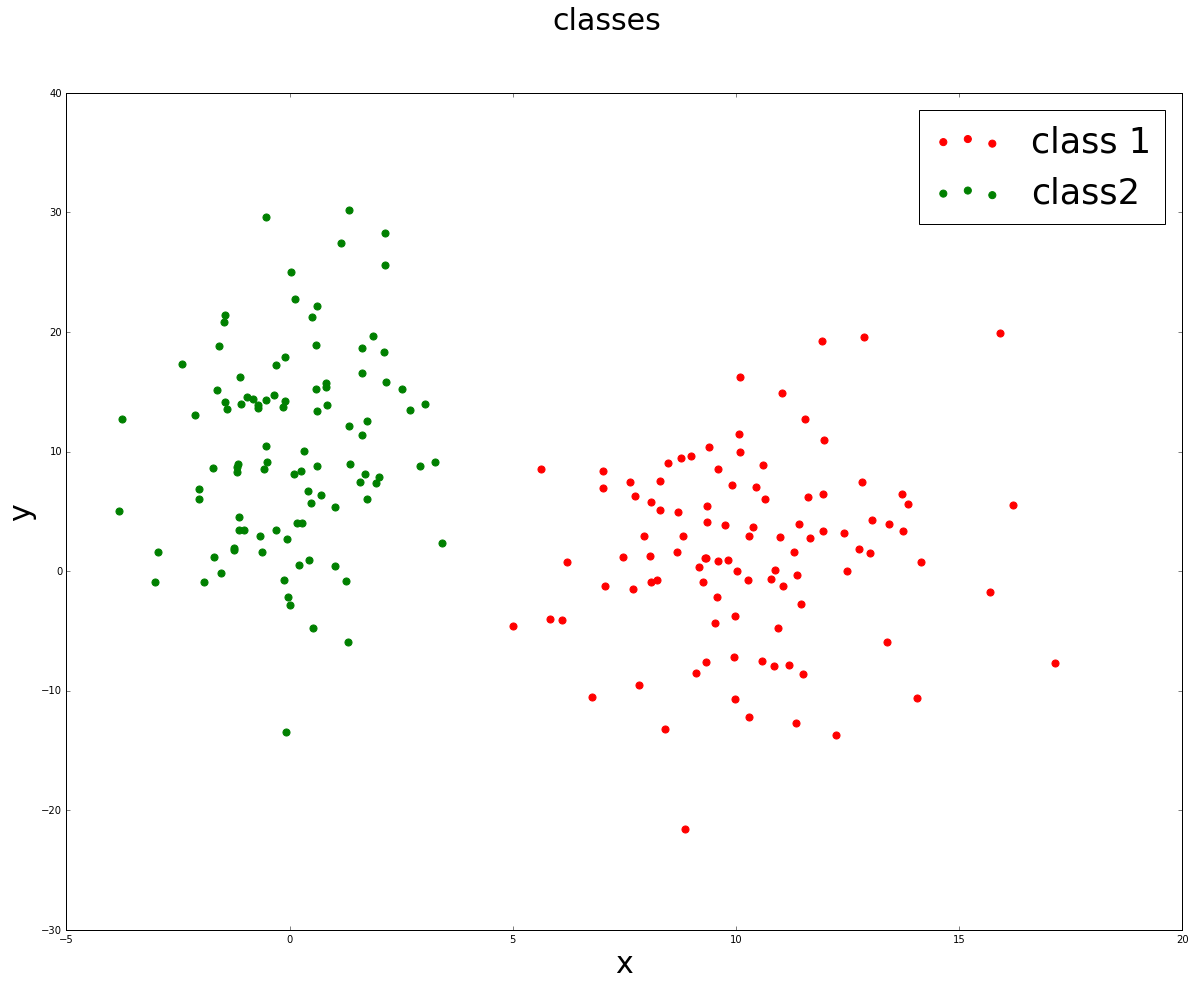

In [28]:
np.random.seed(1)  # for repeatability 
noise1x = np.random.normal(0,2,100)
noise1y = np.random.normal(0,8,100)
noise2 = np.random.normal(0,8,100)
c1[:,0] += noise1x
c1[:,1] += noise1y
c2[:,1] += noise2

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_xlabel('x',fontsize=30)
ax.set_ylabel('y',fontsize=30)
fig.suptitle('classes',fontsize=30)
labels = np.concatenate((l1,l2),)
X = np.concatenate((c1, c2),)
pp1= ax.scatter(c1[:,0], c1[:,1],cmap='prism',s=50,color='r')
pp2= ax.scatter(c2[:,0], c2[:,1],cmap='prism',s=50,color='g')
ax.legend((pp1,pp2),('class 1', 'class2'),fontsize=35)
fig.savefig('classes.png')

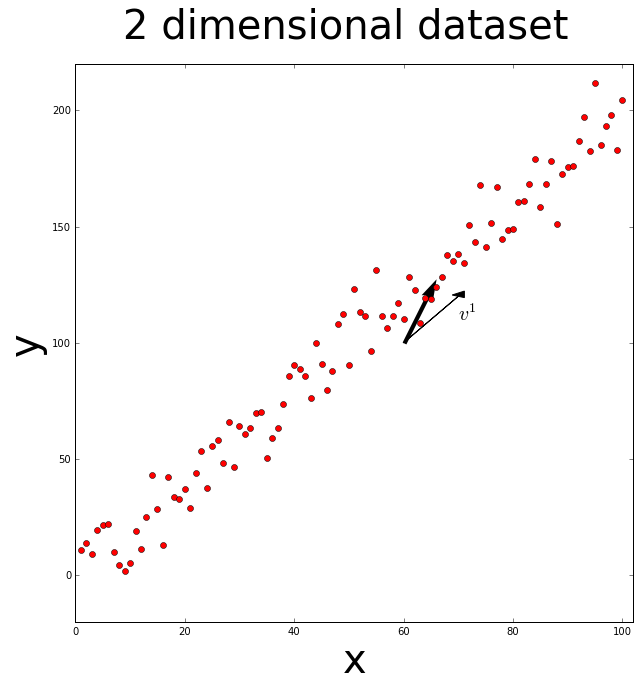

In [35]:
x = np.arange(1,101,1).astype(float)
y = 2 * x
noise = np.random.normal(0,10,100)
y +=noise
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,'ro')
plt.axis([0,102, -20,220])
plt.quiver(60, 100,10-0, 20-0, scale_units='xy', scale=1)
plt.arrow(60, 100,10-0, 20-0,head_width=2.5, head_length=2.5, fc='k', ec='k')
plt.text(70, 110, r'$v^1$', fontsize=20)
ax = fig.add_subplot(111)
ax.axis([0,102, -20,220])
ax.set_xlabel('x',fontsize=40)
ax.set_ylabel('y',fontsize=40)
fig.suptitle('2 dimensional dataset',fontsize=40)
fig.savefig('pca_data.png')

In [36]:
mean_x = np.mean(x)
mean_y = np.mean(y)
u_x = (x- mean_x)/np.std(x)
u_y = (y-mean_y)/np.std(y)
sigma = np.cov([u_x,u_y])

In [39]:
print(mean_x,mean_y,sigma)

(50.5, 99.966970700072523, array([[ 1.01010101,  0.9958141 ],
       [ 0.9958141 ,  1.01010101]]))


array([-1.71481604, -1.68017329, -1.64553055, -1.6108878 , -1.57624505,
       -1.5416023 , -1.50695955, -1.4723168 , -1.43767406, -1.40303131,
       -1.36838856, -1.33374581, -1.29910306, -1.26446031, -1.22981757,
       -1.19517482, -1.16053207, -1.12588932, -1.09124657, -1.05660382,
       -1.02196108, -0.98731833, -0.95267558, -0.91803283, -0.88339008,
       -0.84874733, -0.81410459, -0.77946184, -0.74481909, -0.71017634,
       -0.67553359, -0.64089084, -0.6062481 , -0.57160535, -0.5369626 ,
       -0.50231985, -0.4676771 , -0.43303435, -0.39839161, -0.36374886,
       -0.32910611, -0.29446336, -0.25982061, -0.22517786, -0.19053512,
       -0.15589237, -0.12124962, -0.08660687, -0.05196412, -0.01732137,
        0.01732137,  0.05196412,  0.08660687,  0.12124962,  0.15589237,
        0.19053512,  0.22517786,  0.25982061,  0.29446336,  0.32910611,
        0.36374886,  0.39839161,  0.43303435,  0.4676771 ,  0.50231985,
        0.5369626 ,  0.57160535,  0.6062481 ,  0.64089084,  0.67